In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Arial'

import warnings
warnings.filterwarnings("ignore")

In [2]:
def get_group_figure_rev5(
        dataset: pd.DataFrame,
        order: list,
        feature_order: list,
        palette='Pastel1', figsize=(2.1, 2.1), top_alpha=1.2, is_save_file=False, dpi=600, x_label_rotation='45', ha='ha',
        save_name='a',
        yticks_range = False,
        relative_to_control=False,
        ylim_range = False
    ):

    plt.figure(figsize=figsize)

    # relative_to_control 옵션이 켜져 있으면 Control 그룹의 평균으로 나눔
    if relative_to_control:
        dataset = dataset.copy()
        for feat in feature_order:
            control_mean = dataset.loc[dataset['Label'] == 'Control', feat].mean()
            dataset[feat] = dataset[feat] / control_mean


    for i, feat in enumerate(feature_order):
        plt.subplot(1, 1, i + 1)
  
        sns.stripplot(data=dataset, x='Label', y=feat, order=order, jitter=True, palette=palette, edgecolor="gray", linewidth=1)      
        sns.boxplot(data=dataset, x='Label', y=feat, order=order, palette=palette, showfliers=False)           

        plt.xlabel('')
        plt.ylabel('')
        plt.yticks(fontsize=8.5)
        plt.title(f'\n{feat}', fontdict={'fontsize': 8})
        plt.xticks(fontsize=8)
        bottom, top = plt.ylim()
        plt.ylim(bottom * 0.9, top * top_alpha)

        if yticks_range:
            plt.yticks(yticks_range, fontsize=8)

        if ylim_range:
            plt.ylim(ylim_range)


    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1.1)

    plt.tight_layout()
    if is_save_file:
        plt.savefig(f'figure_{save_name}.png', dpi=dpi)
        print('figure.png file is saved')

    plt.show()


In [8]:
df_scfa = pd.read_excel('./data/SCFA_250501.xlsx', sheet_name='dataset_scfa')
df_scfa_list = ['Acetic acid (AA)', 'Propionic acid (PA)', 'Butyric acid (BA)']

orders = ['Control', 'Chickpea']
g_colors = [ 'lightcoral', 'lightseagreen']

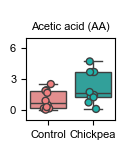

In [9]:
get_group_figure_rev5(df_scfa, order=['Control', 'Chickpea'], palette=g_colors, top_alpha=0.05, ylim_range=[-1, 7], yticks_range=[0, 3, 6,],
                         is_save_file=False, save_name='acetic', ha='right', figsize=(1.35, 1.6), feature_order=[df_scfa_list[0]],  relative_to_control=True)

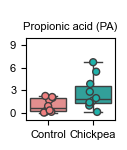

In [10]:
get_group_figure_rev5(df_scfa, order=['Control', 'Chickpea'], palette=g_colors, top_alpha=0.05, ylim_range=[-1, 10], yticks_range=[0, 3, 6, 9],
                         is_save_file=False, save_name='pro', ha='pro', figsize=(1.35, 1.6), feature_order=[df_scfa_list[1]],  relative_to_control=True)

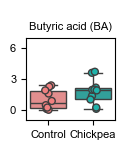

In [11]:
get_group_figure_rev5(df_scfa, order=['Control', 'Chickpea'], palette=g_colors, top_alpha=0.05, ylim_range=[-1, 7], yticks_range=[0, 3, 6, 9, 12],
                         is_save_file=False, save_name='butr', ha='butr', figsize=(1.35, 1.6), feature_order=[df_scfa_list[2]],  relative_to_control=True)